In [110]:
#Importing libraries
import urllib
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
import re

In [171]:
count = 0
URL = "https://www.indeed.com/jobs?q=fintech&l=St.%20Louis%2C%20MO&start="
URLs = []
for url in range(2):
    URLs.append(URL+ str(count))
    count = count +10
    
print(URLs)

['https://www.indeed.com/jobs?q=fintech&l=St.%20Louis%2C%20MO&start=0', 'https://www.indeed.com/jobs?q=fintech&l=St.%20Louis%2C%20MO&start=10']


In [172]:
df = pd.DataFrame(columns=["Title","Location","Company","Summary"])
for url in URLs:
    print(url)
    html = requests.get(url)
    soup = BeautifulSoup(html.content, 'html.parser', from_encoding="utf-8")
    for each in soup.find_all(class_= "result" ):
        try: 
            title = each.find(class_='jobTitle').text.replace('\n', '')
        except:
            title = 'None'
        try:
            location = each.find(class_="companyLocation").text.replace('\n', '')
        except:
            location = 'None'
        try: 
            company = each.find(class_='companyName').text.replace('\n', '')
        except:
            company = 'None'
        try:
            salary = each.find('span', {'class':'no-wrap'}).text
        except:
            salary = 'None'
        synopsis = each.find(class_ ="job-snippet").text.replace('\n', '')
        df = df.append({'Title':title, 'Location':location, 'Company':company, 'Summary':synopsis}, ignore_index=True)
    df = df.append(df)


https://www.indeed.com/jobs?q=fintech&l=St.%20Louis%2C%20MO&start=0
https://www.indeed.com/jobs?q=fintech&l=St.%20Louis%2C%20MO&start=10


In [173]:
df

,Title,Location,Company,Summary
0,newSenior Digital Product Owner-Remote-US Elig...,"St. Louis, MO 63103+2 locations•Remote",EDWARD JONES,Our agile product teams deliver value to all a...
1,newDigital Product Manager-Salesforce-DBX,"St. Louis, MO 63103",EDWARD JONES,The Digital Product Manager of Contact & Relat...
2,Financial Planning Associate,"St. Louis, MO",RFG Advisory,You will be instrumental in nurturing client r...
3,newContract Residential Property Inspector (te...,"St. Louis, MO",Roofstock,D*on't be afraid to break things in the pursui...
4,"Investments, Senior Associate","St. Louis, MO 63101 (Downtown area)",SixThirty Ventures,With corporate partners to mentor and grow the...
...,...,...,...,...
40,Banking-as-a-Service - Product Manager,"St. Louis, MO 63102 (Near North Riverfront area)",Deloitte,We do this by plugging in fintech partners and...
41,Maintenance Technician,"Hazelwood, MO","Fiserv, Inc.","As an Maintenance Technician, you will work in..."
42,Banking-as-a-Service - Product Development Man...,"St. Louis, MO 63102 (Near North Riverfront area)",Deloitte,This full-time Product Development Manager rol...
43,"newPrincipal Product Manager, Payments and Cry...","Lakeview, IL•Remote",Recruiting From Scratch,Accelerate Dapper’s growth as a trusted paymen...


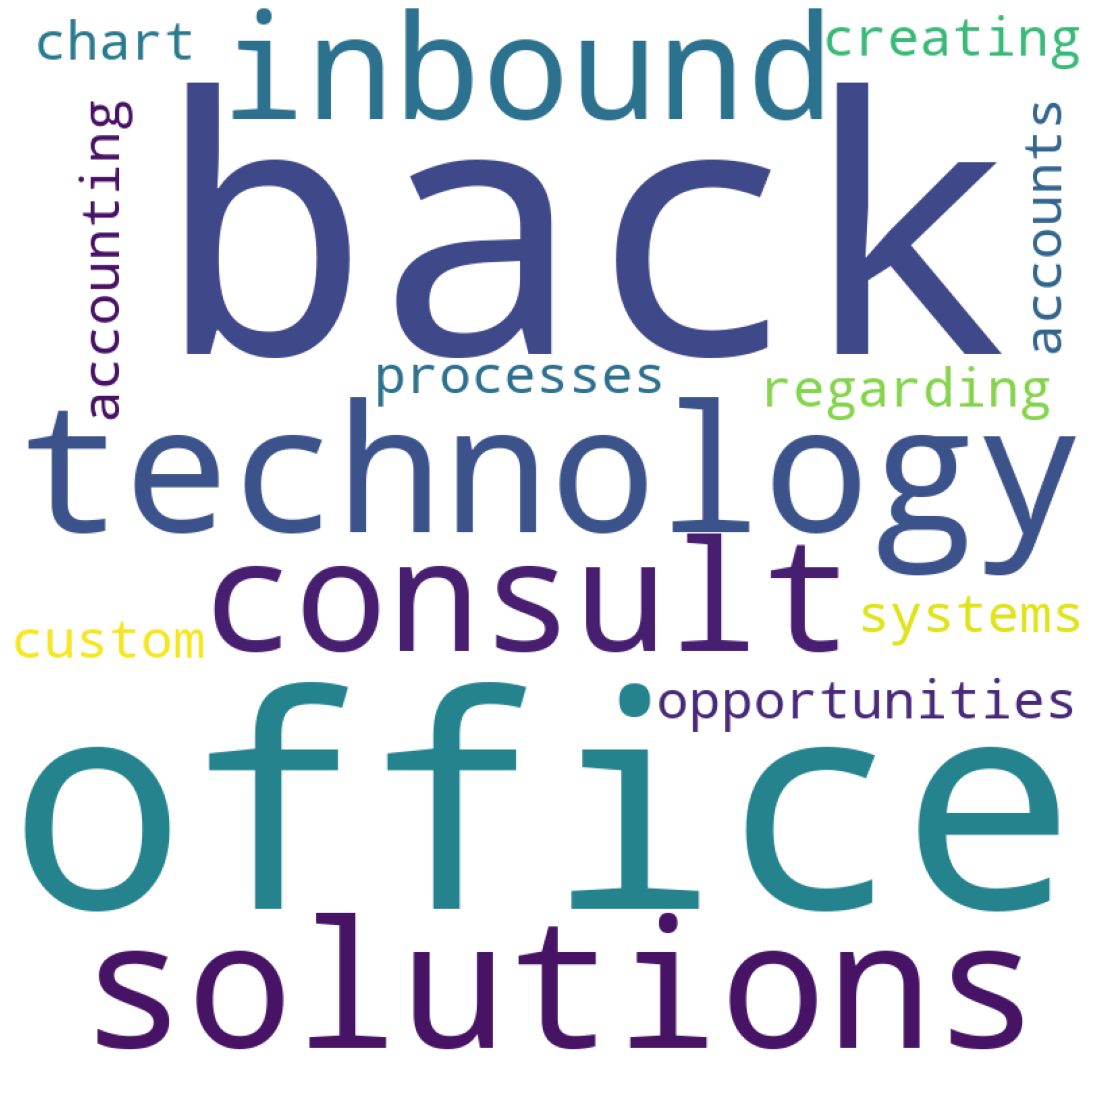

In [167]:
#Final word cloud after all the cleaning and pre-processing
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in df.Summary: 

   # typecaste each val to string 
   val = str(val) 

   # split the value 
   tokens = val.split() 

# Converts each token into lowercase 
for i in range(len(tokens)): 
    tokens[i] = tokens[i].lower() 

for words in tokens: 
    comment_words = comment_words + words + ' '


wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (15, 15), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [174]:
print(df)

                                                Title  \
0   newSenior Digital Product Owner-Remote-US Elig...   
1           newDigital Product Manager-Salesforce-DBX   
2                        Financial Planning Associate   
3   newContract Residential Property Inspector (te...   
4                       Investments, Senior Associate   
..                                                ...   
40             Banking-as-a-Service - Product Manager   
41                             Maintenance Technician   
42  Banking-as-a-Service - Product Development Man...   
43  newPrincipal Product Manager, Payments and Cry...   
44                          Chief Information Officer   

                                            Location  \
0             St. Louis, MO 63103+2 locations•Remote   
1                                St. Louis, MO 63103   
2                                      St. Louis, MO   
3                                      St. Louis, MO   
4                St. Louis, MO 6310

In [177]:
pd.DataFrame.to_csv(df, "jobs.csv")